In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [123]:
sales = pd.read_csv('sales_data.csv', parse_dates=['Date'])

In [22]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


Average Customer Age

In [5]:
sales['Customer_Age'].mean()


35.91921157861212

Visualizations of the Customer Age data

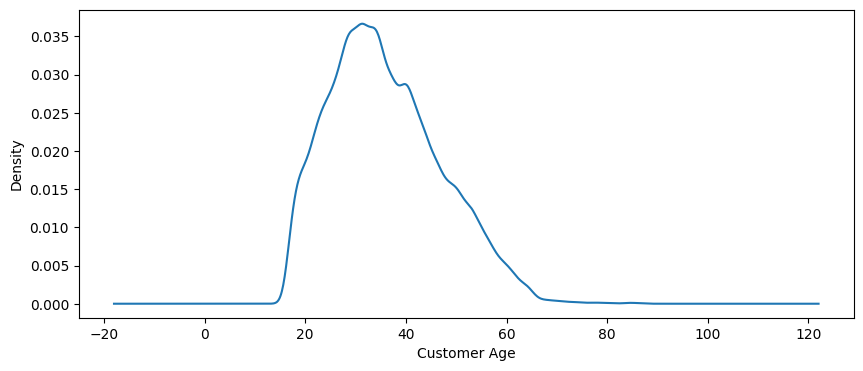

In [13]:
ax = sales['Customer_Age'].plot(kind='density', figsize=(10,4))
ax.set_xlabel('Customer Age');


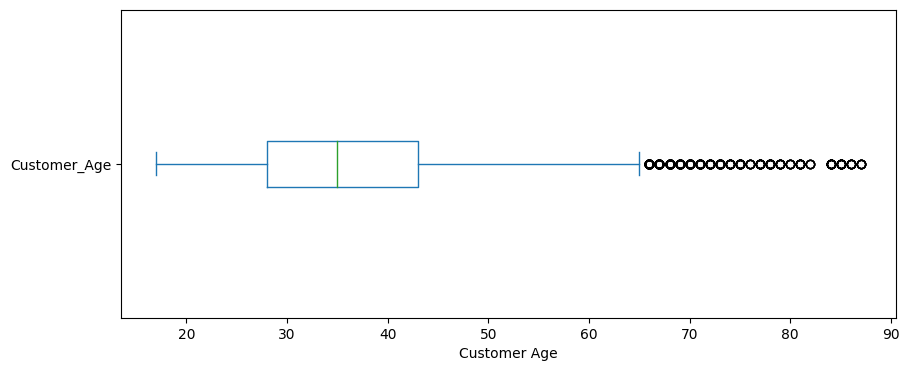

In [14]:
ax = sales['Customer_Age'].plot(kind='box', vert=False, figsize=(10,4))
ax.set_xlabel('Customer Age');

Average Order Quantity

In [15]:
sales['Order_Quantity'].mean()

11.901659648253654

Visualizations of the Order Quantity data

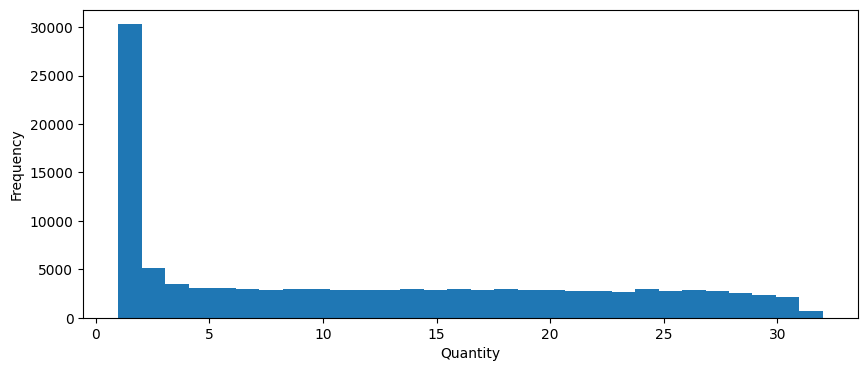

In [17]:
ax = sales['Order_Quantity'].plot(kind='hist', bins=30, figsize=(10,4))
ax.set_xlabel('Quantity');

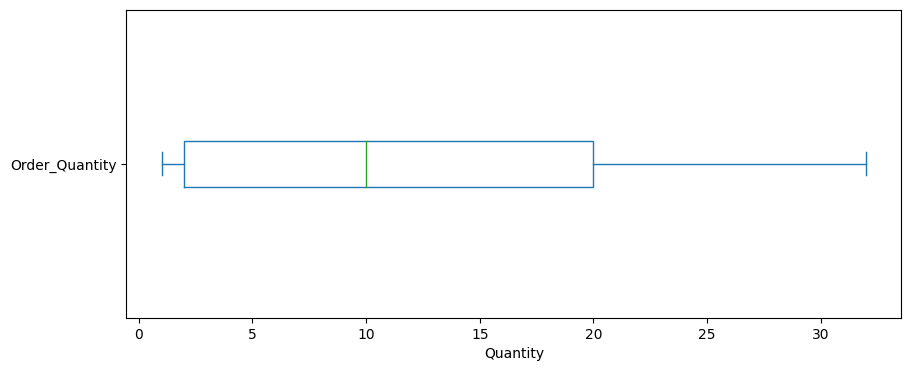

In [19]:
ax = sales['Order_Quantity'].plot(kind='box', vert=False, figsize=(10,4))
ax.set_xlabel('Quantity');

Total sales by year

In [24]:
sales['Year'].value_counts().sort_index()

2011     2677
2012     2677
2013    24443
2014    29398
2015    24443
2016    29398
Name: Year, dtype: int64

Sales by year visualization

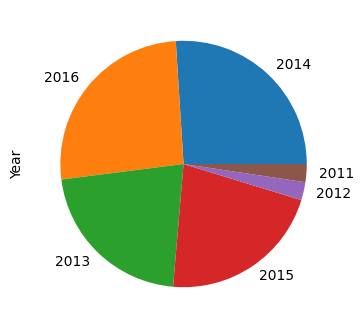

In [30]:
sales['Year'].value_counts().plot(kind='pie', figsize=(4,4));

Total sales by month

In [49]:
sales_month = sales['Month'].value_counts()
sales_month = sales_month.sort_index(key = lambda x: pd.to_datetime(x, format="%B"))
print(sales_month)

January       9284
February      9022
March         9674
April        10182
May          11128
June         11234
July          7462
August        8200
September     8166
October       8750
November      8734
December     11200
Name: Month, dtype: int64


Sales by month visualization

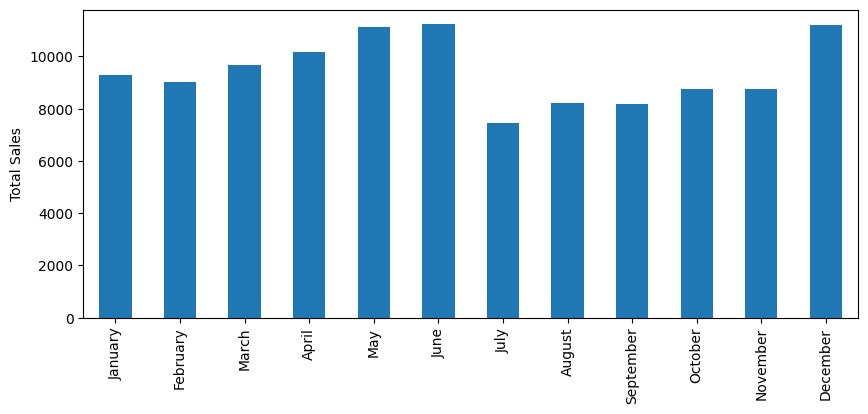

In [60]:
ax = sales_month.plot(kind='bar', figsize=(10,4))
ax.set_ylabel('Total Sales');

Country with the most sales

In [54]:
sales['Country'].value_counts().head(1)

United States    39206
Name: Country, dtype: int64

In [58]:
sales['Country'].value_counts().sort_values(ascending=False)

United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: Country, dtype: int64

Sales per country visualization

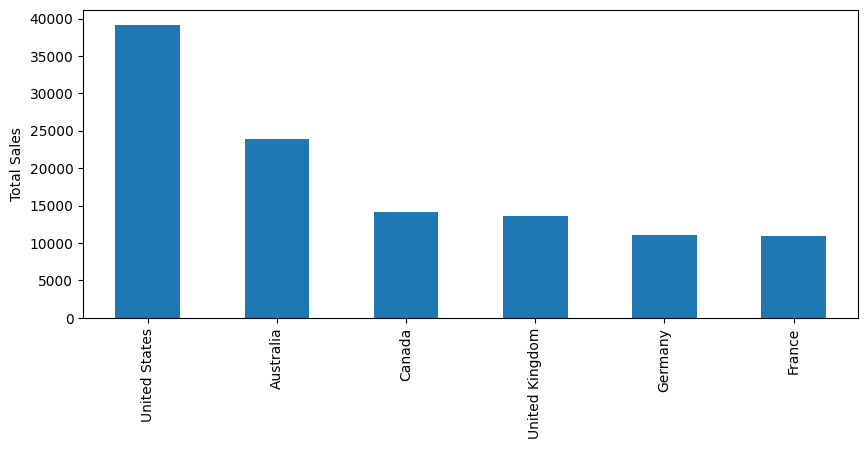

In [61]:
ax = sales['Country'].value_counts().plot(kind='bar', figsize=(10,4))
ax.set_ylabel('Total Sales');

List of all products sold

In [65]:
sales['Product'].unique()

array(['Hitch Rack - 4-Bike', 'All-Purpose Bike Stand',
       'Mountain Bottle Cage', 'Water Bottle - 30 oz.',
       'Road Bottle Cage', 'AWC Logo Cap', 'Bike Wash - Dissolver',
       'Fender Set - Mountain', 'Half-Finger Gloves, L',
       'Half-Finger Gloves, M', 'Half-Finger Gloves, S',
       'Sport-100 Helmet, Black', 'Sport-100 Helmet, Red',
       'Sport-100 Helmet, Blue', 'Hydration Pack - 70 oz.',
       'Short-Sleeve Classic Jersey, XL',
       'Short-Sleeve Classic Jersey, L', 'Short-Sleeve Classic Jersey, M',
       'Short-Sleeve Classic Jersey, S', 'Long-Sleeve Logo Jersey, M',
       'Long-Sleeve Logo Jersey, XL', 'Long-Sleeve Logo Jersey, L',
       'Long-Sleeve Logo Jersey, S', 'Mountain-100 Silver, 38',
       'Mountain-100 Silver, 44', 'Mountain-100 Black, 48',
       'Mountain-100 Silver, 48', 'Mountain-100 Black, 38',
       'Mountain-200 Silver, 38', 'Mountain-100 Black, 44',
       'Mountain-100 Silver, 42', 'Mountain-200 Black, 46',
       'Mountain-200 Silver

Bar plot of the top 10 selling products

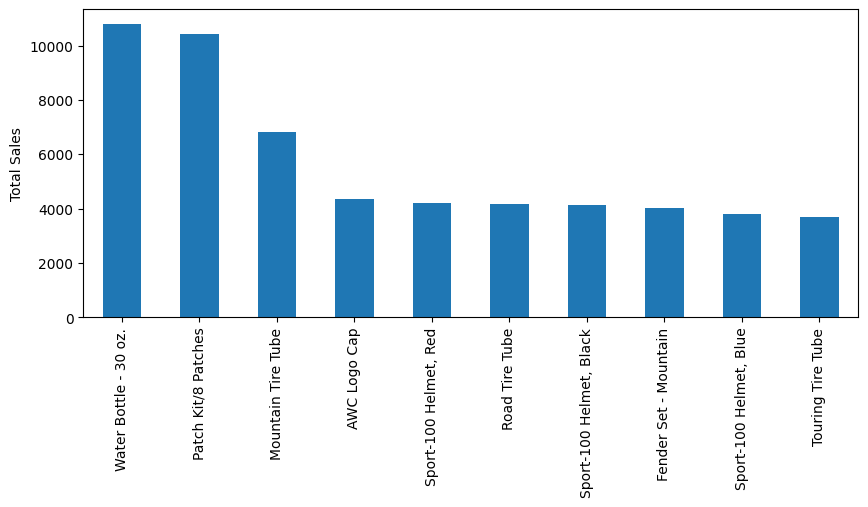

In [67]:
ax = sales['Product'].value_counts().head(10).plot(kind='bar', figsize=(10,4))
ax.set_ylabel('Total Sales');

Relationship between unit price and unit cost

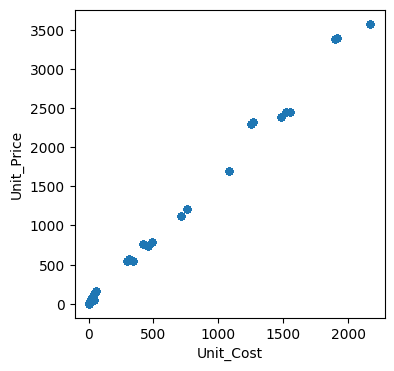

In [70]:
sales.plot(kind='scatter', x='Unit_Cost', y='Unit_Price', figsize=(4,4));

Relationship between order quantity and profit

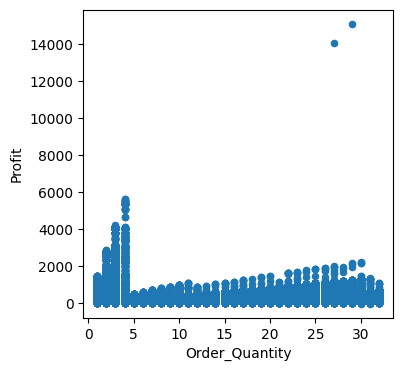

In [72]:
sales.plot(kind='scatter', x='Order_Quantity', y='Profit', figsize=(4,4));

Relationship between profit per country

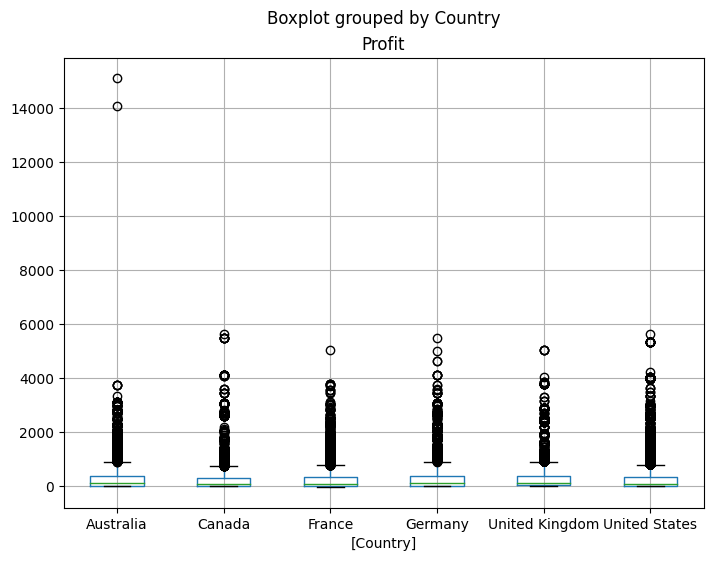

In [79]:
sales[['Profit', 'Country']].boxplot(by='Country', figsize=(8,6));

Relationship between customer age per country

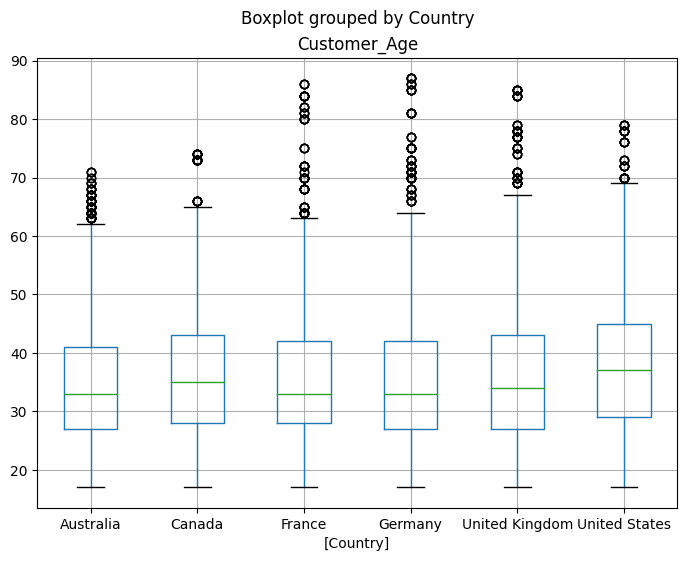

In [81]:
sales[['Customer_Age', 'Country']].boxplot(by='Country', figsize=(8,6));

Create a new date column using day, month, and year

In [82]:
sales['Full_Date'] = sales[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)

sales['Full_Date'].head()

0    2013-November-26
1    2015-November-26
2       2014-March-23
3       2016-March-23
4         2014-May-15
Name: Full_Date, dtype: object

Convert the new date column into a datetime object

In [83]:
sales['Full_Date'] = pd.to_datetime(sales['Full_Date'])

sales['Full_Date'].head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Full_Date, dtype: datetime64[ns]

Total sales trend by date

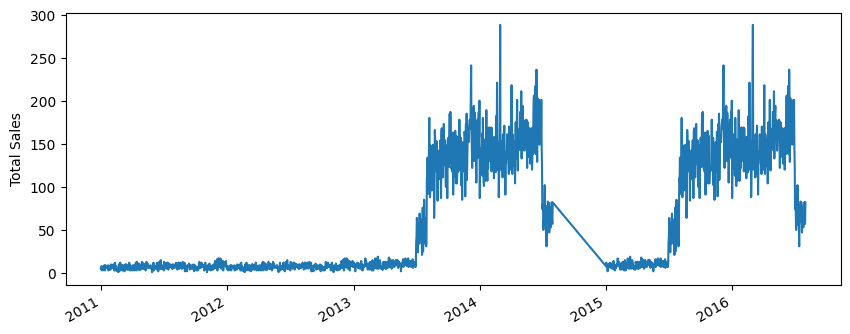

In [86]:
ax = sales['Full_Date'].value_counts().plot(kind='line', figsize=(10,4))
ax.set_ylabel('Total Sales');

Number of orders made in Canada or France

In [87]:
sales.loc[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')].shape[0]

25176

Number of Bike Rack orders in Canada

In [91]:
sales.loc[(sales['Country'] == 'Canada') & (sales['Sub_Category'] == 'Bike Racks')].shape[0]

104

Orders by each region in France

In [92]:
region = sales.loc[sales['Country'] == 'France', 'State'].value_counts()
region

Seine (Paris)        2328
Seine Saint Denis    1684
Nord                 1670
Hauts de Seine       1084
Essonne               994
Yveline               954
Seine et Marne        394
Moselle               386
Loiret                382
Val d'Oise            264
Garonne (Haute)       208
Val de Marne          158
Charente-Maritime     148
Somme                 134
Loir et Cher          120
Pas de Calais          90
Name: State, dtype: int64

Visualization of orders by region

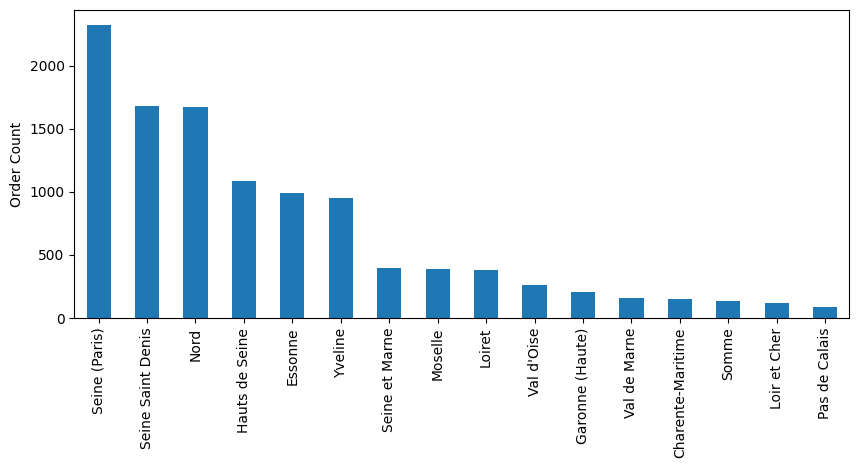

In [103]:
ax = region.plot(kind='bar', figsize=(10,4))
ax.set_ylabel('Order Count');

Total sales per product category

In [97]:
sales['Product_Category'].value_counts()

Accessories    70120
Bikes          25982
Clothing       16934
Name: Product_Category, dtype: int64

Visualization of sales per category

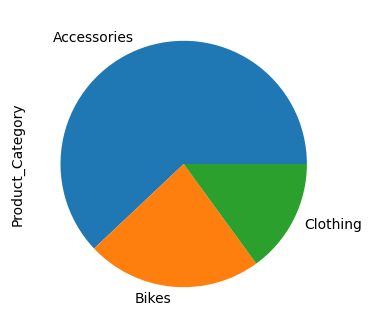

In [99]:
sales['Product_Category'].value_counts().plot(kind='pie', figsize=(4,4));

Total sales per accessories sub-category

In [100]:
accessories = sales.loc[sales['Product_Category'] == 'Accessories', 'Sub_Category'].value_counts()
accessories

Tires and Tubes      33870
Bottles and Cages    15876
Helmets              12158
Fenders               4032
Cleaners              1802
Hydration Packs       1334
Bike Racks             592
Bike Stands            456
Name: Sub_Category, dtype: int64

Visualization of total sales per accessories sub-category

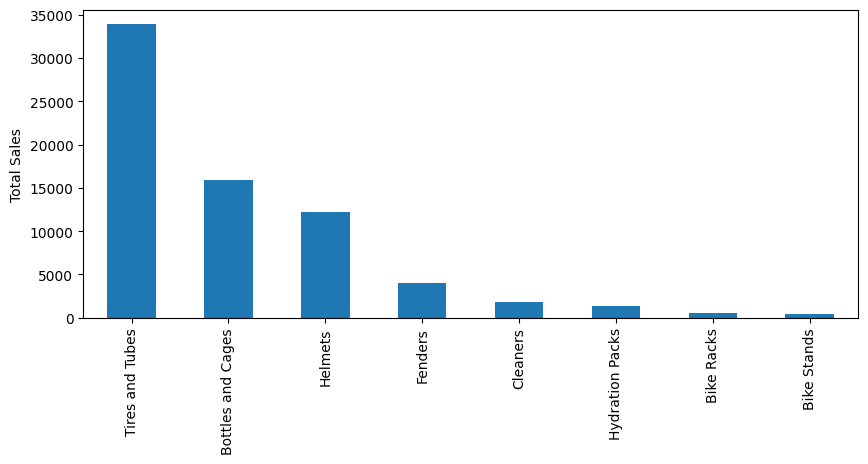

In [104]:
ax = accessories.plot(kind='bar', figsize=(10,4))
ax.set_ylabel('Total Sales');

Orders made per bike sub-category

In [105]:
bikes = sales.loc[sales['Product_Category'] == 'Bikes', 'Sub_Category'].value_counts()
bikes

Road Bikes        13430
Mountain Bikes     8854
Touring Bikes      3698
Name: Sub_Category, dtype: int64

Visualization of total orders per bike sub-category

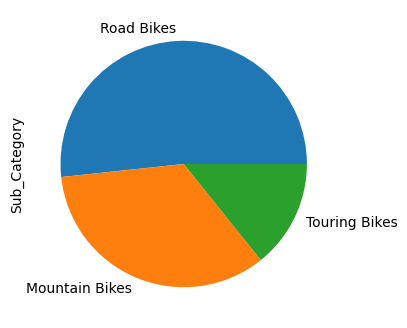

In [107]:
bikes.plot(kind='pie', figsize=(4,4));

Top 5 sales with the highest revenue

In [108]:
sales.sort_values(['Revenue'], ascending=False).head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Full_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58074,2015-07-24
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27,1482,2384,14055,40014,54069,2013-07-24
71129,2011-07-08,8,July,2011,22,Youth (<25),M,Canada,Alberta,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5628,8684,14312,2011-07-08
70307,2011-04-30,30,April,2011,44,Adults (35-64),M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14169,2011-04-30
70601,2011-09-30,30,September,2011,19,Youth (<25),F,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14169,2011-09-30


Sale with the highest revenue

In [111]:
sales.sort_values(['Revenue'], ascending=False).head(1)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Full_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58074,2015-07-24


Average order quantity of orders with more than $10K in revenue

In [112]:
i = sales['Revenue'] > 10_000

sales.loc[i, 'Order_Quantity'].mean()

3.7218934911242605

Average order quantity of orders with less than $10K in revenue

In [113]:
i = sales['Revenue'] < 10_000

sales.loc[i, 'Order_Quantity'].mean()

11.913907519469818

Total orders made in May of 2016

In [114]:
i = (sales['Year'] == 2016) & (sales['Month'] == 'May')

sales.loc[i].shape[0]

5015

Total orders made between May and July of 2016

In [115]:
i = (sales['Year'] == 2016) & (sales['Month'].isin(['May', 'June', 'July']))

sales.loc[i].shape[0]

12164

Show a grouped <b>box plot</b> per month with the profit values.

<Axes: title={'center': 'Profit'}, xlabel='[Month]'>

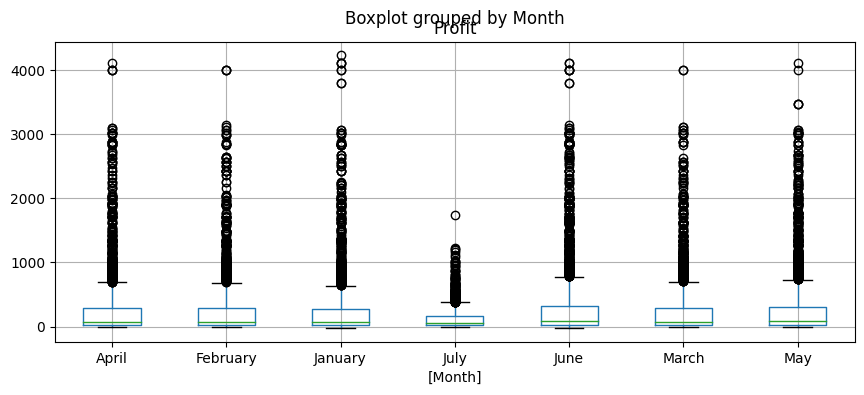

In [121]:
profit_2016 = sales.loc[sales['Year'] == 2016, ['Profit', 'Month']]

profit_2016.boxplot(by='Month', figsize=(10,4))

Add 5% tax on every sale unit price within the United States

In [122]:
sales.loc[sales['Country'] == 'United States', 'Unit_Price'] *= 1.05